In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
print(df.sample(5))
df.dropna(inplace=True)

     Survived   Age     Fare
232         0  59.0  13.5000
11          1  58.0  26.5500
864         0  24.0  13.0000
51          0  21.0   7.8000
192         1  19.0   7.8542


In [4]:
x = df.iloc[:,1:]
y = df['Survived']
print(x)
print(y)
# kbins_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
# kbins_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
# trf = ColumnTransformer(
#     [
#         ('first', kbins_age, [0]),
#         ('second', kbins_fare, [1])
#     ])
# x_trs = trf.fit_transform(x)
# x_trs

      Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
885  39.0  29.1250
886  27.0  13.0000
887  19.0  30.0000
889  26.0  30.0000
890  32.0   7.7500

[714 rows x 2 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [36]:
def Discretize(x, y, bins, strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy, subsample=None)
    kbins_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy, subsample=None)
    trf = ColumnTransformer(
        [
            ('first', kbins_age, [0]),
            ('second', kbins_fare, [1])
        ])
    # print(x.sample(5))
    dt = DecisionTreeClassifier()
    print(f'Accuracy Score of non-binarized data: {cross_val_score(dt, x, y).mean()}')
    x_trs = trf.fit_transform(x)
    # print(x)
    # print(x_trs)
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
    # x_train_trs = trf.fit_transform(x_train)
    # x_test_trs = trf.transform(x_test)
    # dt.fit(x_train_trs, y_train)
    # y_pred = dt.predict(x_test)
    # print(f"The accuracy score: {accuracy_score(y_pred, y_test)}")
    print(f'Accuracy Score of binarized data: {cross_val_score(dt, x_trs, y).mean()}')
    print(x.columns)
    i=0
    for col in x.columns:
          fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
          sns.histplot(x[col], ax=ax1)
          ax1.set_title(f'Distribution of Non-Binarized {col}')
          sns.histplot(x_trs[:,i], ax=ax2)
          ax2.set_title(f'Distribution of Binarized {col}')
          i=i+1

Accuracy Score of non-binarized data: 0.6246528119767557
Accuracy Score of binarized data: 0.6765488033093667
Index(['Age', 'Fare'], dtype='object')


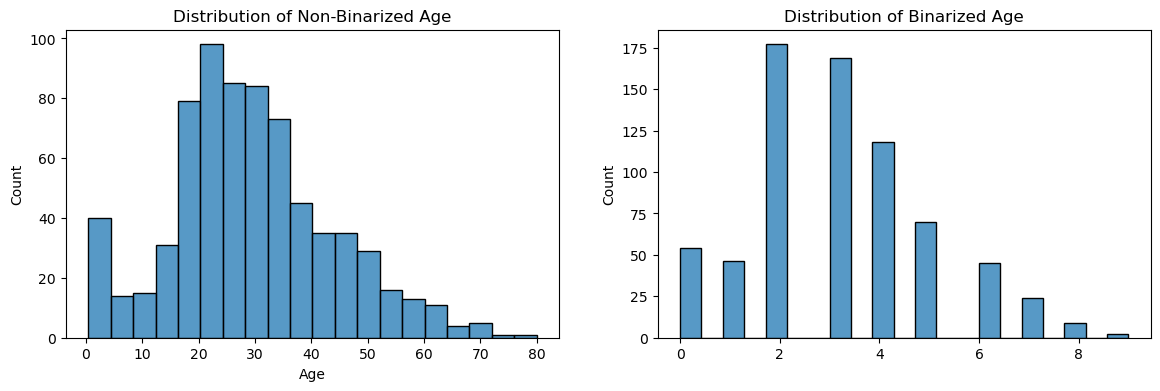

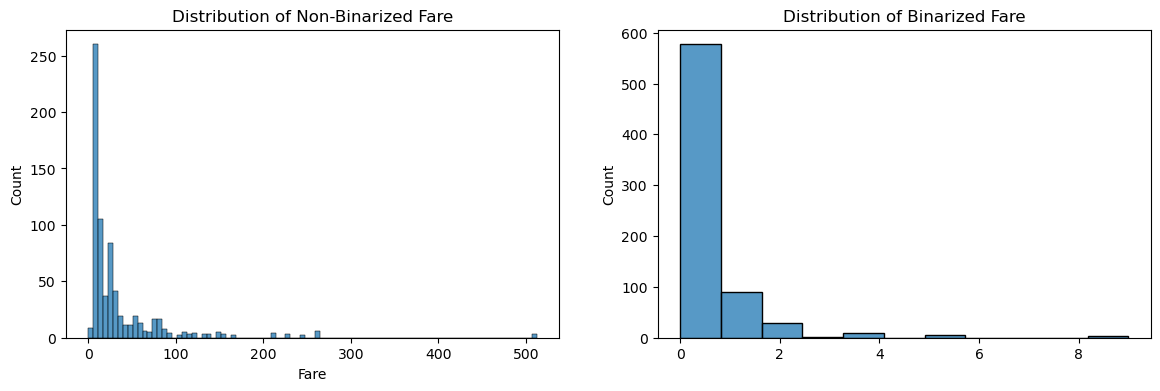

In [40]:
Discretize(x, y, 10, 'uniform')